# Aufgabe 2 - Tiefe Einblicke ins Institut

Den Code immer nachvollziehbar kommentieren! Bitte beachtet, dass das Notebook von Anfang bis Ende ohne Fehler durchlaufen muss und dass die requirements.txt Datei aktualisiert wird.

## Teilaufgabe a): Trainings-und Testdatenset
## Teilaufgabe b): Verteilung RGB

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from PIL import Image


def thumbnail(img):
    img_list = np.asarray(img.resize((30, 30))).reshape(1, 2700)
    final_list = np.array([item for sublist in img_list for item in sublist])
    return final_list


class PicData:
    def __init__(self, name):
        file_paths = {
            'prof': "Professorenbuero",
            'hall': "Flur",
            'lab': "Labor",
            'tea': "Teekueche"
        }
        name_to_label = {
            'prof': 1,
            'hall': 2,
            'lab': 3,
            'tea': 4
        }
        pic_amount = len(os.listdir(f"Bilder/{file_paths[name]}"))
        self.path = file_paths[name]
        self.pics = [Image.open(f"Bilder/{self.path}/{self.path + str(i + 1)}.jpg") for i in range(pic_amount)]
        self.data = np.array([img.histogram() for img in self.pics])
        random.shuffle(self.data)
        #self.labels = np.array([name_to_label[name] for _ in range(len(self.data))])
        #self.img_train, self.img_test, self.lbl_train, self.lbl_test = train_test_split(self.data, self.labels, test_size=0.2)
        self.train = [(self.data[i], name_to_label[name]) for i in range(int(0.8 * len(self.data)))]
        self.test  = [(self.data[i], name_to_label[name]) for i in range(int(0.8 * len(self.data)), len(self.data))]

prof_pics = PicData('prof')
hall_pics = PicData('hall')
lab_pics = PicData('lab')
tea_pics = PicData('tea')

'''print(len(prof_pics.train))
print(len(prof_pics.test))
print(prof_pics.train[0])
print(prof_pics.img_test)
print(prof_pics.lbl_train)
print(prof_pics.lbl_test)
'''
"""
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].hist(prof_pics.histogram, label='prof', bins=768)
ax[0, 1].hist(hall_pics.histogram, label='hall', bins=768)
ax[1, 0].hist(lab_pics.histogram, label='lab', bins=768)
ax[1, 1].hist(tea_pics.histogram, label='tea', bins=768)

ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()
ax[1, 1].legend()

plt.show()
"""




"\nfig, ax = plt.subplots(2, 2, figsize=(10, 10))\nax[0, 0].hist(prof_pics.histogram, label='prof', bins=768)\nax[0, 1].hist(hall_pics.histogram, label='hall', bins=768)\nax[1, 0].hist(lab_pics.histogram, label='lab', bins=768)\nax[1, 1].hist(tea_pics.histogram, label='tea', bins=768)\n\nax[0, 0].legend()\nax[0, 1].legend()\nax[1, 0].legend()\nax[1, 1].legend()\n\nplt.show()\n"

## Teilaufgabe c): Training und Test mit Random Forest

In [29]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier

complete_train = list(prof_pics.train) + list(hall_pics.train) + list(lab_pics.train) + list(tea_pics.train)
complete_test = list(prof_pics.test) + list(hall_pics.test) + list(lab_pics.test) + list(tea_pics.test)
random.shuffle(complete_train)
random.shuffle(complete_test)


X_train = [item[0] for item in complete_train]
y_train = [item[1] for item in complete_train]
X_test = [item[0] for item in complete_test]
y_test = [item[1] for item in complete_test]

rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
#print(r2_score(y_train, y_pred_train))

#complete_image_list = list(prof_pics.img_train) + list(hall_pics.img_train) + list(lab_pics.img_train) + #list(tea_pics.img_train)
#complete_label_list = list(prof_pics.lbl_train) + list(hall_pics.lbl_train) + list(lab_pics.lbl_train) + list(tea_pics.lbl_train)
#rf.fit(complete_image_list, complete_label_list)


Predictions:  [1 2 1 1 2]
Forest output:  [1, 1, 1, 1, 1]
Mean Absolute Error: 0.4°.
Score: 0.6
Accuracy: 60.0 %.
Confusion matrix:  [[3 2]
 [0 0]]


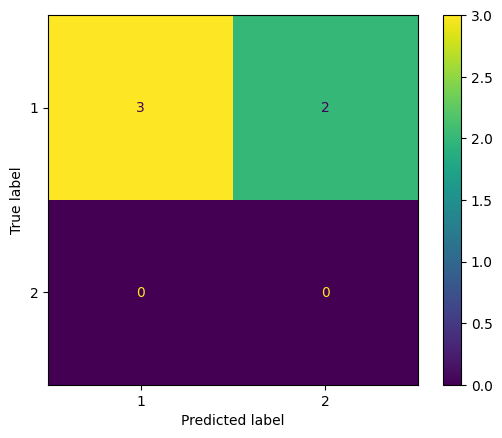

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

current_test_list = tea_pics.test
current_test_data = [item[0] for item in current_test_list]
current_test_lbl = [item[1] for item in current_test_list]

y_pred = rf.predict(current_test_data)
errors = abs(y_pred - current_test_lbl)
conf_matrix = confusion_matrix(current_test_lbl, y_pred)
ConfusionMatrixDisplay.from_predictions(current_test_lbl, y_pred)
mape = 100 * (errors / current_test_lbl)
accuracy = 100 - np.mean(mape)
errors = abs(y_pred - current_test_lbl)
print('Predictions: ', str(y_pred))
print('Forest output: ', str(current_test_lbl))
#print(r2_score(current_test_lbl, y_pred))
print('Mean Absolute Error:', str(round(np.mean(errors), 2)) + '°.')
print("Score:", rf.score(current_test_data, current_test_lbl))
print('Accuracy:', round(accuracy, 2), '%.')
print('Confusion matrix: ', str(conf_matrix))
plt.show()

## Teilaufgabe d): Hyperparameteroptimierung

## Teilaufgabe e): Dimensionalitätsreduktion